In [3]:
from geopy.geocoders import Nominatim
from geopy import distance
%matplotlib inline
from datetime import datetime as dt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [41]:
geolocator = Nominatim(user_agent="myGeocoder")

In [42]:
# initialize Nominatim API
geolocator = Nominatim(user_agent="geoapiExercises")

In [ ]:
# Latitude & Longitude input
Latitude = "25.594095"
Longitude = "85.137566"

location = geolocator.reverse(Latitude+","+Longitude)
address = location.raw['address']
print(address)
address['city']

In [5]:
data = pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\ct_rr.csv")

C:\Users\DELL\AppData\Local\Temp\ipykernel_18092\2116370262.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\ct_rr.csv")


In [5]:
data.shape

(1048575, 6)

In [ ]:
data.count()

In [ ]:
data.month.unique()

In [8]:
df = data[data.duplicated()]
len(df)

128429

In [9]:
data.drop_duplicates(keep = 'first', inplace = True)

In [10]:
data.shape

(920146, 6)

In [11]:
data.head()

,ts,number,pick_lat,pick_lng,drop_lat,drop_lng
0,07-04-2018 07:07,14626,12.313621,76.658195,12.287301,76.602280
1,07-04-2018 07:32,85490,12.943947,77.560745,12.954014,77.543770
2,07-04-2018 07:36,5408,12.899603,77.587300,12.934780,77.569950
3,07-04-2018 07:38,58940,12.918229,77.607544,12.968971,77.636375
4,07-04-2018 07:39,5408,12.899490,77.587270,12.934780,77.569950


In [12]:
data.nunique()

ts          128436
number       74160
pick_lat    173934
pick_lng     44599
drop_lat     69295
drop_lng     31731
dtype: int64

In [8]:
new = data["ts"].str.split(" ", n = 1, expand = True) 
data["raw_date"]= new[0] 
data["raw_time"]= new[1] 
data.head()

,ts,number,pick_lat,pick_lng,drop_lat,drop_lng,raw_date,raw_time
0,07-04-2018 07:07,14626,12.313621,76.658195,12.287301,76.602280,07-04-2018,07:07
1,07-04-2018 07:32,85490,12.943947,77.560745,12.954014,77.543770,07-04-2018,07:32
2,07-04-2018 07:36,5408,12.899603,77.587300,12.934780,77.569950,07-04-2018,07:36
3,07-04-2018 07:38,58940,12.918229,77.607544,12.968971,77.636375,07-04-2018,07:38
4,07-04-2018 07:39,5408,12.899490,77.587270,12.934780,77.569950,07-04-2018,07:39


In [9]:
new = data["raw_date"].str.split("-", n = 2, expand = True) 
data["year"]= new[0] 
data["month"]= new[1] 
data["date"]= new[2] 
data.head()

,ts,number,pick_lat,pick_lng,drop_lat,drop_lng,raw_date,raw_time,year,month,date
0,07-04-2018 07:07,14626,12.313621,76.658195,12.287301,76.602280,07-04-2018,07:07,07,04,2018
1,07-04-2018 07:32,85490,12.943947,77.560745,12.954014,77.543770,07-04-2018,07:32,07,04,2018
2,07-04-2018 07:36,5408,12.899603,77.587300,12.934780,77.569950,07-04-2018,07:36,07,04,2018
3,07-04-2018 07:38,58940,12.918229,77.607544,12.968971,77.636375,07-04-2018,07:38,07,04,2018
4,07-04-2018 07:39,5408,12.899490,77.587270,12.934780,77.569950,07-04-2018,07:39,07,04,2018


In [10]:
new = data["raw_time"].str.split(":", n = 2, expand = True) 
data["hour"]= new[0]
data.head()

,ts,number,pick_lat,pick_lng,drop_lat,drop_lng,raw_date,raw_time,year,month,date,hour
0,07-04-2018 07:07,14626,12.313621,76.658195,12.287301,76.602280,07-04-2018,07:07,07,04,2018,07
1,07-04-2018 07:32,85490,12.943947,77.560745,12.954014,77.543770,07-04-2018,07:32,07,04,2018,07
2,07-04-2018 07:36,5408,12.899603,77.587300,12.934780,77.569950,07-04-2018,07:36,07,04,2018,07
3,07-04-2018 07:38,58940,12.918229,77.607544,12.968971,77.636375,07-04-2018,07:38,07,04,2018,07
4,07-04-2018 07:39,5408,12.899490,77.587270,12.934780,77.569950,07-04-2018,07:39,07,04,2018,07


In [11]:
data = data.copy()
data.drop(["raw_date","raw_time"],axis=1, inplace=True)
data.head()

,ts,number,pick_lat,pick_lng,drop_lat,drop_lng,year,month,date,hour
0,07-04-2018 07:07,14626,12.313621,76.658195,12.287301,76.602280,07,04,2018,07
1,07-04-2018 07:32,85490,12.943947,77.560745,12.954014,77.543770,07,04,2018,07
2,07-04-2018 07:36,5408,12.899603,77.587300,12.934780,77.569950,07,04,2018,07
3,07-04-2018 07:38,58940,12.918229,77.607544,12.968971,77.636375,07,04,2018,07
4,07-04-2018 07:39,5408,12.899490,77.587270,12.934780,77.569950,07,04,2018,07


# Function for finding the distance between two coordinates in Km in Pandas Dataframe

In [12]:
def distance(pick_lat, pick_lng, drop_lat, drop_lng):
    R = 6373.0
    s_lat, s_lng, e_lat, e_lng = map(np.radians, [pick_lat, pick_lng, drop_lat, drop_lng])
    d = np.sin((e_lat - s_lat) / 2)**2 + np.cos(s_lat) * np.cos(e_lat) * np.sin((e_lng - s_lng) / 2)**2
    return round(2 * R * np.arcsin(np.sqrt(d)), 5)

In [13]:
data["distance"] = data.apply(lambda x: distance(x.pick_lat, x.pick_lng, x.drop_lat, x.drop_lng), axis=1)
data.head()

,ts,number,pick_lat,pick_lng,drop_lat,drop_lng,year,month,date,hour,distance
0,07-04-2018 07:07,14626,12.313621,76.658195,12.287301,76.602280,07,04,2018,07,6.74511
1,07-04-2018 07:32,85490,12.943947,77.560745,12.954014,77.543770,07,04,2018,07,2.15403
2,07-04-2018 07:36,5408,12.899603,77.587300,12.934780,77.569950,07,04,2018,07,4.34139
3,07-04-2018 07:38,58940,12.918229,77.607544,12.968971,77.636375,07,04,2018,07,6.45159
4,07-04-2018 07:39,5408,12.899490,77.587270,12.934780,77.569950,07,04,2018,07,4.35131


## Function for extracting session by timestamp

In [14]:
data['hour'] = pd.to_numeric(data['hour'], errors='coerce')

# Drop rows with NaN values in the 'hour' column
data.dropna(subset=['hour'], inplace=True)

b = [0,4,8,12,16,20,24]
l = ['Late Night', 'Early Morning','Morning','AfterNoon','Evening','Night']
data['session'] = pd.cut(data['hour'], bins=b, labels=l, include_lowest=True)

## By Creating a User-defined Function

In [15]:
def f(x):
    if (x > 4) and (x <= 8):
        return 'Early Morning'
    elif (x > 8) and (x <= 12 ):
        return 'Morning'
    elif (x > 12) and (x <= 16):
        return'AfterNoon'
    elif (x > 16) and (x <= 20) :
        return 'Evening'
    elif (x > 20) and (x <= 24):
        return'Night'
    elif (x <= 4):
        return'Late Night'

data['session'] = data['hour'].apply(f)

In [16]:
data

,ts,number,pick_lat,pick_lng,drop_lat,drop_lng,year,month,date,hour,distance,session
0,07-04-2018 07:07,14626,12.313621,76.658195,12.287301,76.602280,07,04,2018,7,6.74511,Early Morning
1,07-04-2018 07:32,85490,12.943947,77.560745,12.954014,77.543770,07,04,2018,7,2.15403,Early Morning
2,07-04-2018 07:36,5408,12.899603,77.587300,12.934780,77.569950,07,04,2018,7,4.34139,Early Morning
3,07-04-2018 07:38,58940,12.918229,77.607544,12.968971,77.636375,07,04,2018,7,6.45159,Early Morning
4,07-04-2018 07:39,5408,12.899490,77.587270,12.934780,77.569950,07,04,2018,7,4.35131,Early Morning
...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,06-08-2018 15:08,83286,12.907205,77.628550,12.958899,77.660980,06,08,2018,15,6.73955,AfterNoon
1048571,06-08-2018 15:09,57723,12.970593,77.656170,12.982676,77.693140,06,08,2018,15,4.22655,AfterNoon
1048572,06-08-2018 15:09,83286,12.907235,77.628570,12.958899,77.660980,06,08,2018,15,6.73557,AfterNoon
1048573,06-08-2018 15:12,70034,12.917923,77.613700,12.908604,77.610680,06,08,2018,15,1.08703,AfterNoon


## Plotting of Graph to show the distance

<Axes: xlabel='distance'>

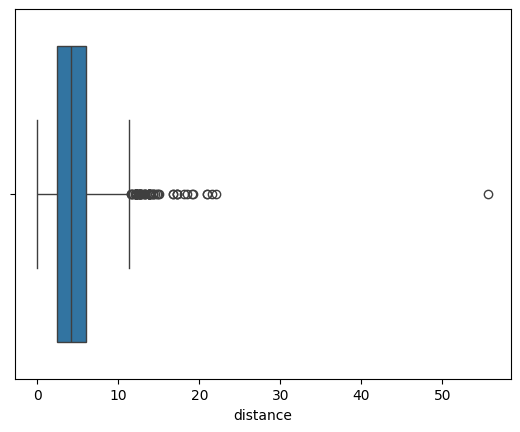

In [62]:
sns.boxplot(x=data['distance'].head(1000))

In [63]:
data['distance'].max(), data['distance'].min(), data['distance'].mean()

(17259.26804, 0.0, 7.878171888395972)

### Observation: There are Outliers present in the distance column, so remove it.

In [17]:
index_Distance = data[ (data['distance'] >= 12) & (data['distance'] == 0.0) ].index
data.drop(index_Distance , inplace=True)
data.head(15)

,ts,number,pick_lat,pick_lng,drop_lat,drop_lng,year,month,date,hour,distance,session
0,07-04-2018 07:07,14626,12.313621,76.658195,12.287301,76.602280,07,04,2018,7,6.74511,Early Morning
1,07-04-2018 07:32,85490,12.943947,77.560745,12.954014,77.543770,07,04,2018,7,2.15403,Early Morning
2,07-04-2018 07:36,5408,12.899603,77.587300,12.934780,77.569950,07,04,2018,7,4.34139,Early Morning
3,07-04-2018 07:38,58940,12.918229,77.607544,12.968971,77.636375,07,04,2018,7,6.45159,Early Morning
4,07-04-2018 07:39,5408,12.899490,77.587270,12.934780,77.569950,07,04,2018,7,4.35131,Early Morning
5,07-04-2018 07:43,5408,12.899421,77.587326,12.934780,77.569950,07,04,2018,7,4.36086,Early Morning
6,07-04-2018 07:43,50266,12.898679,77.604340,12.877949,77.595900,07,04,2018,7,2.48076,Early Morning
7,07-04-2018 07:52,58940,12.918229,77.607544,12.968971,77.636375,07,04,2018,7,6.45159,Early Morning
8,07-04-2018 07:52,58940,12.918229,77.607544,12.968971,77.636375,07,04,2018,7,6.45159,Early Morning
9,07-04-2018 07:53,28126,12.911840,77.602250,12.940866,77.540710,07,04,2018,7,7.41175,Early Morning


In [18]:
data['session'].value_counts()

session
Morning          343422
Evening          318645
AfterNoon        178358
Night            102485
Early Morning     99266
Late Night         6399
Name: count, dtype: int64

<Axes: xlabel='session', ylabel='count'>

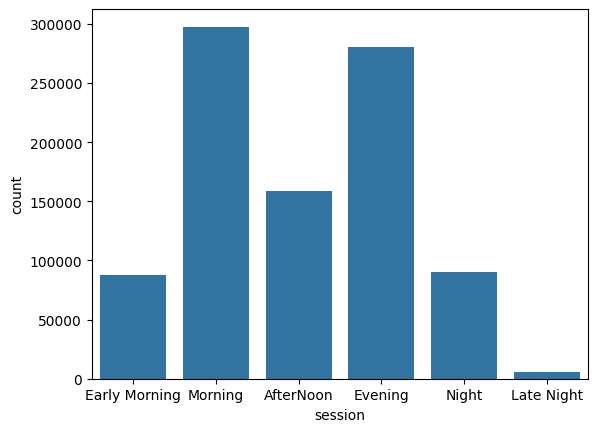

In [68]:
sns.countplot(x= data['session'])

Observation: Graph shows that the most busiest session is Morning and Evening bcz most office-going people use rides at that time


<Axes: xlabel='session'>

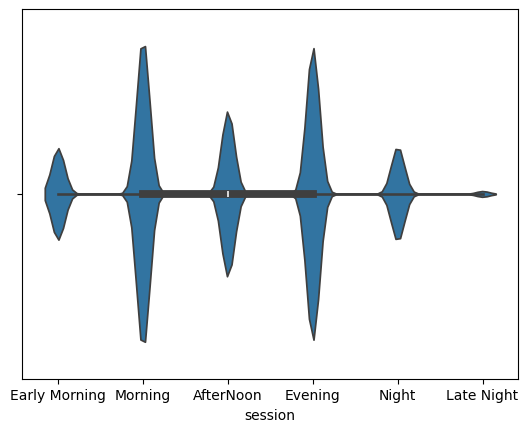

In [72]:
sns.violinplot(x='session', y=None, data=data)


<Axes: xlabel='session'>

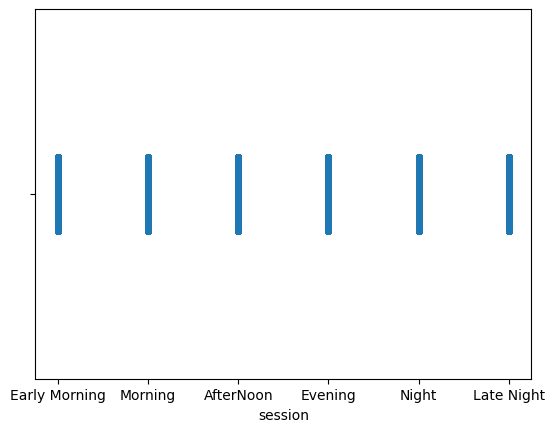

In [74]:
sns.stripplot(x='session', y=None, data=data)


<Axes: xlabel='hour', ylabel='Count'>

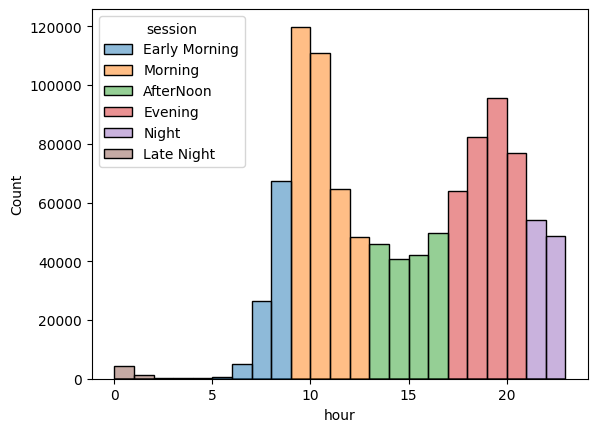

In [19]:

sns.histplot(data=data,x=data.hour,bins=30,binwidth=1,hue=data.session)

In [28]:
data['month'].value_counts().sort_index()

month
04    209281
05    246228
06    263027
07    282412
08     47627
Name: count, dtype: int64

C:\Users\DELL\AppData\Local\Temp\ipykernel_18092\1651839233.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x= 'month',order=data['month'].value_counts().index.sort_values(),width=0.6,palette=custom_palette)
C:\Users\DELL\AppData\Local\Temp\ipykernel_18092\1651839233.py:3: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.countplot(data=data, x= 'month',order=data['month'].value_counts().index.sort_values(),width=0.6,palette=custom_palette)


<Axes: xlabel='month', ylabel='count'>

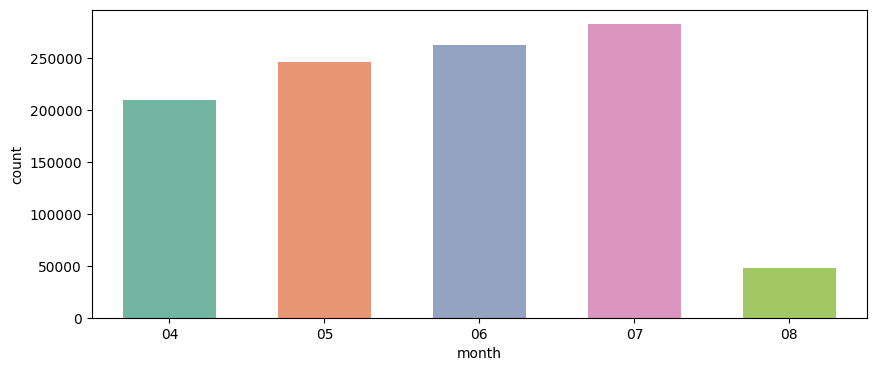

In [39]:
custom_palette = sns.color_palette("Set2")
plt.figure(figsize=(10, 4))
sns.countplot(data=data, x= 'month',order=data['month'].value_counts().index.sort_values(),width=0.6,palette=custom_palette)